# **Plants Seedling Classification- Problem Statement**

## **Background and Context:**
In recent times, the field of agriculture has been in urgent need of modernizing, since the amount of manual work people need to put in to check if plants are growing correctly is still highly extensive. Despite several advances in agricultural technology, people working in the agricultural industry still need to have the ability to sort and recognize different plants and weeds, which takes a lot of time and effort in the long term.

The potential is ripe for this trillion-dollar industry to be greatly impacted by technological innovations that cut down on the requirement for manual labor, and this is where Artificial Intelligence can benefit the workers in this field, as the time and energy required to identify plant seedlings will be greatly shortened by the use of AI and Deep Learning. The ability to do so far more efficiently and even more effectively than experienced manual labor could lead to better crop yields, the freeing up of human involvement for higher-order agricultural decision making, and in the long term will result in more sustainable environmental practices in agriculture as well.

## **Objective**

The Aarhus University Signal Processing group, in collaboration with the University of Southern Denmark, has provided the data containing images of unique plants belonging to 12 different species. You being a data scientist, need to build a Convolutional Neural Network model which would classify the plant seedlings into their respective 12 categories.

## **Data Description**

This dataset contains images of unique plants belonging to 12 different species.
The data file names are:
images.npy
Label.csv
Due to the large volume of data, the images were converted to numpy arrays and stored in images.npy file and the corresponding labels are also put into Labels.csv so that you can work on the data/project seamlessly without having to worry about the high data volume.
The goal of the project is to create a classifier capable of determining a plant's species from an image.

**List of Plant species**

* Black-grass
* Charlock
* Cleavers
* Common Chickweed
* Common Wheat
* Fat Hen
* Loose Silky-bent
* Maize
* Scentless Mayweed
* Shepherds Purse
* Small-flowered Cranesbill
* Sugar beet

## **Importing the necessary libraries**

In [3]:
#Reading the training images from the path and labelling them into the given categories

import os
import numpy as np                                                                               # Importing numpy for Matrix Operations
import pandas as pd                                                                              # Importing pandas to read CSV files
import matplotlib.pyplot as plt                                                                  # Importting matplotlib for Plotting and visualizing images
import math                                                                                      # Importing math module to perform mathematical operations
import cv2                                                                                       # Importing openCV for image processing
import seaborn as sns                                                                            # Importing seaborn to plot graphs


# Tensorflow modules
import tensorflow as tf
import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator                              # Importing the ImageDataGenerator for data augmentation
from tensorflow.keras.models import Sequential, Model                                            # Importing the sequential module to define a sequential model
from tensorflow.keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPooling2D,BatchNormalization
from tensorflow.keras.layers import Activation, Input, LeakyReLU, SpatialDropout2D               # Defining all the layers to build our CNN Model
from tensorflow.keras.optimizers import RMSprop,Adam,SGD                                         # Importing the optimizers which can be used in our model
from sklearn import preprocessing, metrics                                                       # Importing the preprocessing module to preprocess the data and metrics
from sklearn.model_selection import train_test_split                                             # Importing train_test_split function to split the data into train and test
from sklearn.metrics import confusion_matrix                                                     # Importing confusion_matrix to plot the confusion matrix
from tensorflow.keras.models import Sequential                                                   #sequential api for sequential model 
from tensorflow.keras import backend 
from tensorflow.keras.utils import to_categorical                                                #to perform one-hot encoding
from tensorflow.keras import losses, optimizers
from tensorflow.keras.callbacks import EarlyStopping                                             #regularization method to prevent the overfitting
from tensorflow.keras.callbacks import ModelCheckpoint




from google.colab.patches import cv2_imshow                                                      # Importing cv2_imshow from google.patches to display images

# Importing all the required sub-modules from Keras
from keras.applications.vgg16 import VGG16
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing.image import img_to_array, load_img



# Ignore warnings
#import warnings
#warnings.filterwarnings('ignore')

## **Reading the dataset**

In [4]:
# Mount Google drive to access the dataset

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
# Load the image file of the dataset
images = np.load("/content/drive/MyDrive/Plants_Seedling_Classification/images.npy")

# Load the labels file of the dataset
labels= pd.read_csv("/content/drive/MyDrive/Plants_Seedling_Classification/Labels.csv")

## **Overview of the dataset**


Let's print the shape of the images and labels 

In [4]:
print(images.shape)
print(labels.shape)

(4750, 128, 128, 3)
(4750, 1)


* The data contains 4750 images, with resolution of 128 px by 128 px.
* The data are colored which there are 3 channels per image.
* Also the label data contain 4750 labels related to each image.


## **Plotting images**

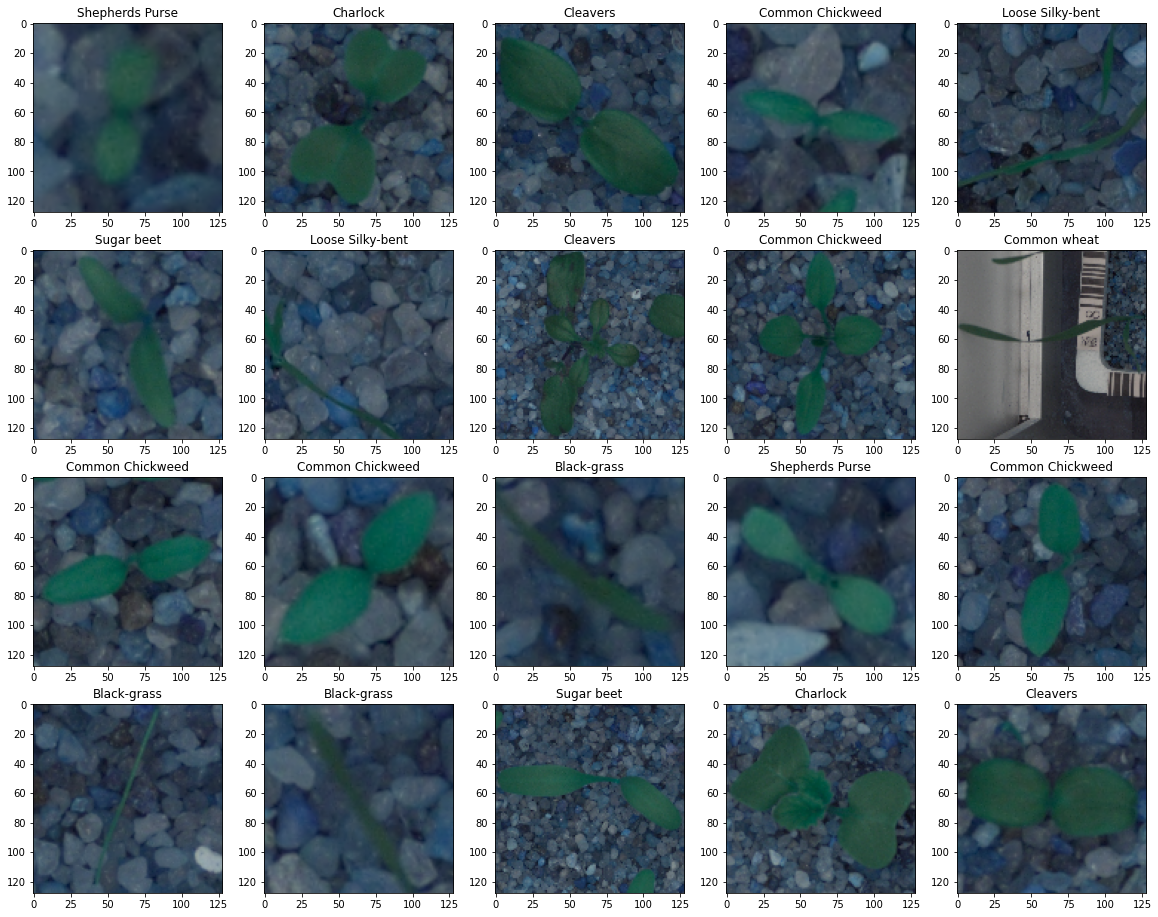

In [5]:
from numpy import random

fig = plt.figure(figsize=(20, 8))
fig.set_size_inches(20, 16)

for i in range(0,20): 
  rand_number = random. randint(0,len(labels))
  ax = plt.subplot(4, 5, i + 1)
    
  plt.imshow(images[rand_number])
  plt.title(labels['Label'][rand_number])
  

* As it is obvious, the data are shown in BGR format.
* Using the pyplot library can not show the image in true color. 
* Converting the images to RGB can help show them by pyplot library.

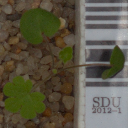

In [6]:
# plot a sample image by cv2
cv2_imshow(images[222])

- We can observe that the images are being shown in different colors when plotted with openCV and matplotlib as OpenCV reads images in BGR format and this shows that the given numpy arrays were generated from the original images using OpenCV.
- Now we will convert these BGR images to RGB images so we could interpret them easily.

## **Conver the images to RGB format**

In [16]:
# Converting the images from BGR to RGB using cvtColor function of OpenCV
for i in range(len(images)):
  images[i] = cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB)

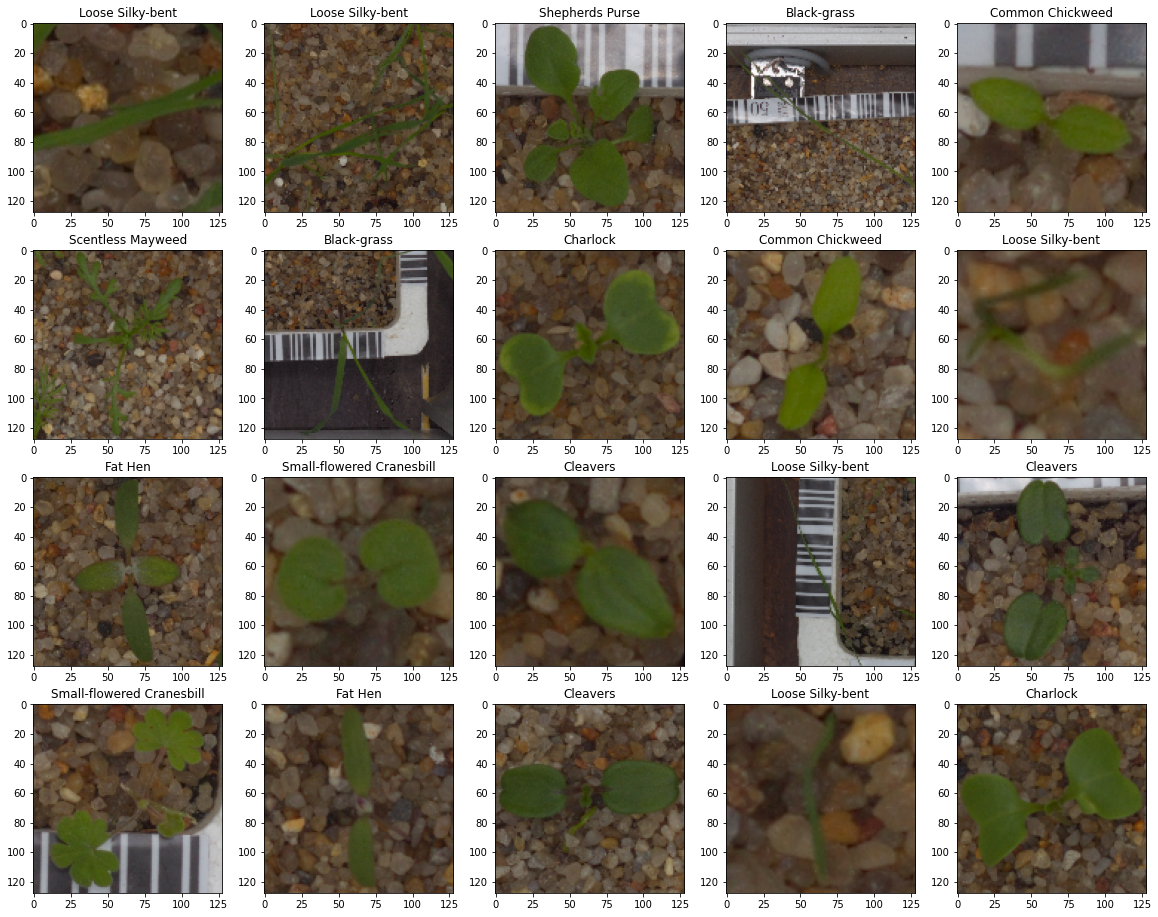

In [8]:
from numpy import random

fig = plt.figure(figsize=(20, 8))
fig.set_size_inches(20, 16)

for i in range(0,20): 
  rand_number = random. randint(0,len(labels))
  ax = plt.subplot(4, 5, i + 1)
    
  plt.imshow(images[rand_number])
  plt.title(labels['Label'][rand_number])

* Converting the data to RGB, help to interpret them easier.
* The above images are randmolt selected from dataset.

### **1. Grayscale Conversion**

In [6]:
# Converting the images from BGR to RGB using cvtColor function of OpenCV
gray_scale=[]
for i in range(len(images)):
  gray_scale.append(cv2.cvtColor(images[i], cv2.COLOR_RGB2GRAY))

* Run tme for below code is too much

In [13]:
#Trying to convert all the images to the grayscale 
#Make a copy of images

# images_grayscale= images.copy()

#for i in range (0 , len(images)):
#   for j in range (0,128):
#     for k in range (0,128):
#       r, g, b = images[i][j][k][0], images[i][j][k][1], images[i][j][k][2]
#       grayscale = (0.299*r + 0.587*g + 0.114*b)
#       images_grayscale[i][j][k][0] = grayscale
#       images_grayscale[i][j][k][1] = grayscale 
#       images_grayscale[i][j][k][2] = grayscale

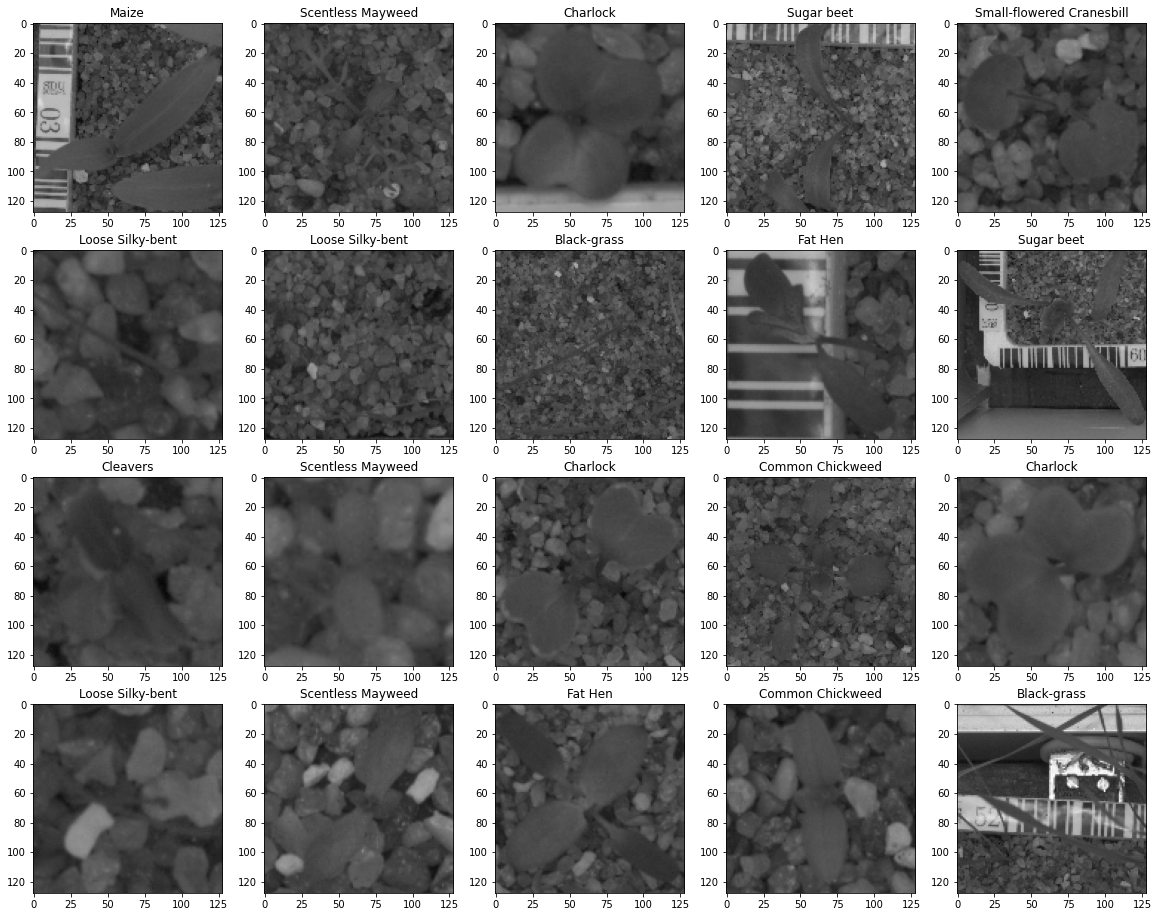

In [14]:
from numpy import random

fig = plt.figure(figsize=(20, 8))
fig.set_size_inches(20, 16)

for i in range(0,20): 
  rand_number = random. randint(0,len(labels))
  ax = plt.subplot(4, 5, i + 1)
    
  plt.imshow(images_grayscale[rand_number])
  plt.title(labels['Label'][rand_number])

* With simple grayscale, lets analyze how vertical and horizontal edges are important to distinguish the species. 




### **Vertical and Horizontal Edge dtection**

In [15]:
kernel_x = np.array([[-1,-1,-1],[0,0,0],[1,1,1]]) # Horizontal Edge Detector
kernel_y = np.array([[-1,0,1],[-1,0,1],[-1,0,1]]) # Vertical Edge Detector
print("Horizontal Edge Detector:")
print(kernel_x)
print("Vertical Edge Detector:")
print(kernel_y)

Horizontal Edge Detector:
[[-1 -1 -1]
 [ 0  0  0]
 [ 1  1  1]]
Vertical Edge Detector:
[[-1  0  1]
 [-1  0  1]
 [-1  0  1]]


* Two kernels are defined for horizontal and vertical edge detection.

In [16]:
prewitt1_x=cv2.filter2D(images_grayscale[0],-1,kernel_x) # Convolution operation for the input image with the Horizontal Edge Detector
prewitt1_y=cv2.filter2D(images_grayscale[0],-1,kernel_y) # Convolution operation for the input image with the Vertical Edge Detector

prewitt1_xy= cv2.bitwise_or(prewitt1_x,prewitt1_y) # Combining both edge detectors

<function matplotlib.pyplot.show>

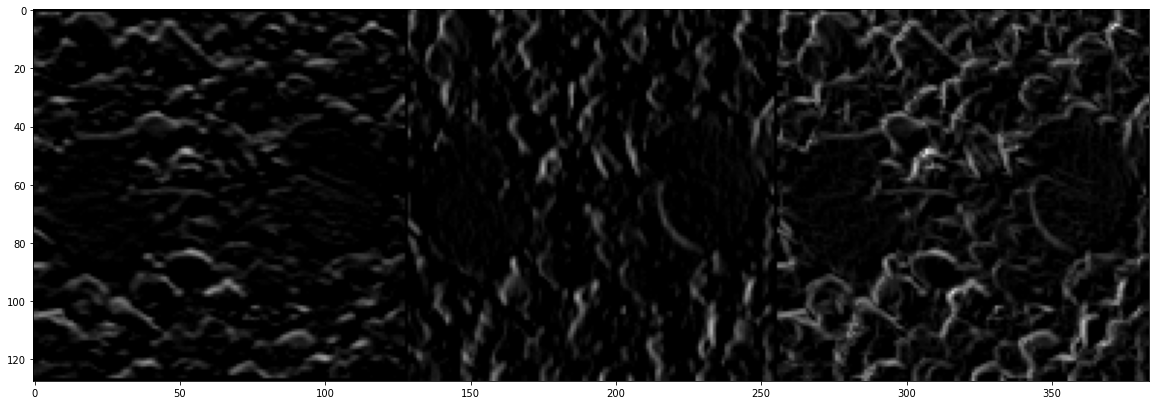

In [17]:
fig = plt.figure(figsize=(20, 8))
fig.set_size_inches(20, 8)

frame_prewitt1=cv2.hconcat((prewitt1_x,prewitt1_y,prewitt1_xy)) # Concatenating the images

plt.imshow(frame_prewitt1)
plt.show

In [18]:
prewitt2_x=cv2.filter2D(images_grayscale[2218],-1,kernel_x) # Convolution operation for the input image with the Horizontal Edge Detector
prewitt2_y=cv2.filter2D(images_grayscale[2218],-1,kernel_y) # Convolution operation for the input image with the Vertical Edge Detector

prewitt2_xy= cv2.bitwise_or(prewitt2_x,prewitt2_y) # Combining both edge detectors

<function matplotlib.pyplot.show>

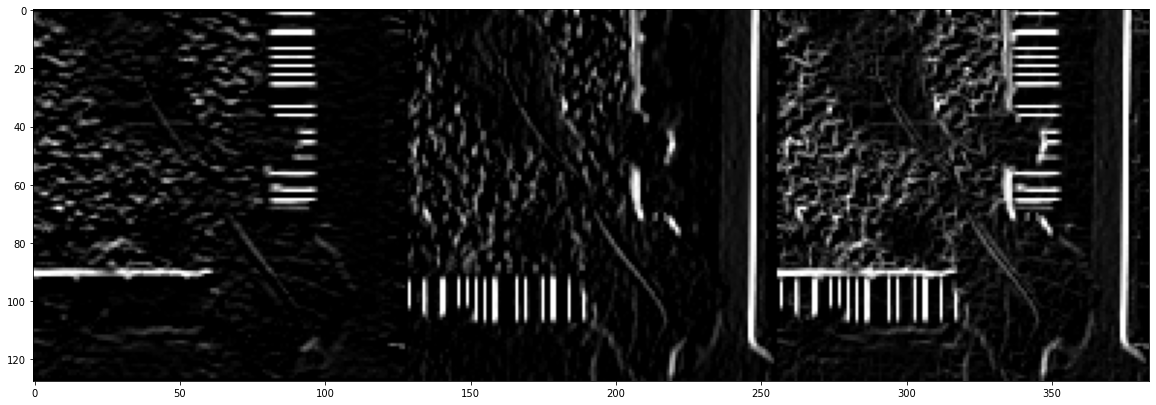

In [19]:
fig = plt.figure(figsize=(20, 8))
fig.set_size_inches(20, 8)

frame_prewitt2=cv2.hconcat((prewitt2_x,prewitt2_y,prewitt2_xy)) # Concatenating the images

plt.imshow(frame_prewitt2)
plt.show

In the above images (As an example images  #1 and  #2218): 

- **On the left, we have the output from the Horizontal Prewitt Filter**, where as we can see, horizontal edges are more prominent.

- **In the middle, we have the results of the Vertical Prewitt Filter**, where the main vertical edges of the image are visible.

- **The image on the right is simply the Bitwise OR combination of the two kernel outputs**, and by combining just these two outputs, we see that a significant amount of vertical and horizontal edges of the original image, can be understood.

- **The background noise is too much and make the detection hard using grayscale.




### **The Sobel Filter**

* Lets try another filter 

In [20]:
# Sobel Edge Detection
sobelx = cv2.Sobel(src=images_grayscale[2218], ddepth=cv2.CV_64F, dx=1, dy=0, ksize=3) # Sobel Edge Detection on the X axis used for vertical edge detection
sobely = cv2.Sobel(src=images_grayscale[2218], ddepth=cv2.CV_64F, dx=0, dy=1, ksize=3) # Sobel Edge Detection on the Y axis used for horizontal edge detection

sobelxy = cv2.bitwise_or(sobelx,sobely) # Combined X and Y Sobel Edge Detection

<function matplotlib.pyplot.show>

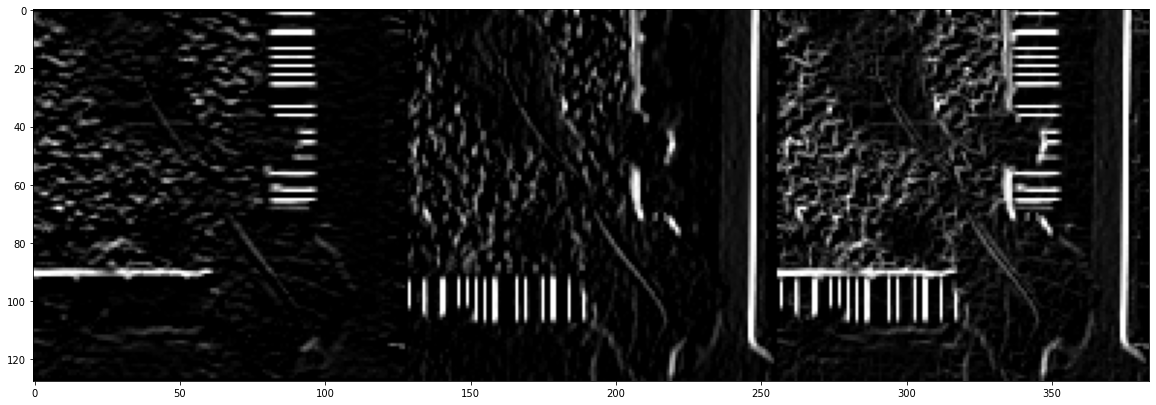

In [21]:
fig = plt.figure(figsize=(20, 8))
fig.set_size_inches(20, 8)

frame_sobel=cv2.hconcat((sobelx,sobely,sobelxy)) # Concatenating the images

plt.imshow(frame_prewitt2)
plt.show

We obtain the above images after applying Sobel edge detection to the input image. The leftmost image is the output of the Sobel vertical edge detector, the one in the middle is the output from the Sobel horizontal edge detector, and the image on the right is a combination of the two. 

Comparing this output with that from the Prewitt filter, we notice that **the Sobel edge detector finds some more edges in the image in comparison to Prewitt.** This is the implication of the change where **we allotted more weight to the central edge values** in the kernels for the Sobel filter. 



### **The Laplacian Filter**

The Laplacian Filter works by **highlighting those regions where the gradient of pixel intensities changes abruptly.** Unlike the Sobel edge detector,the Laplacian edge detector **uses only one kernel.**

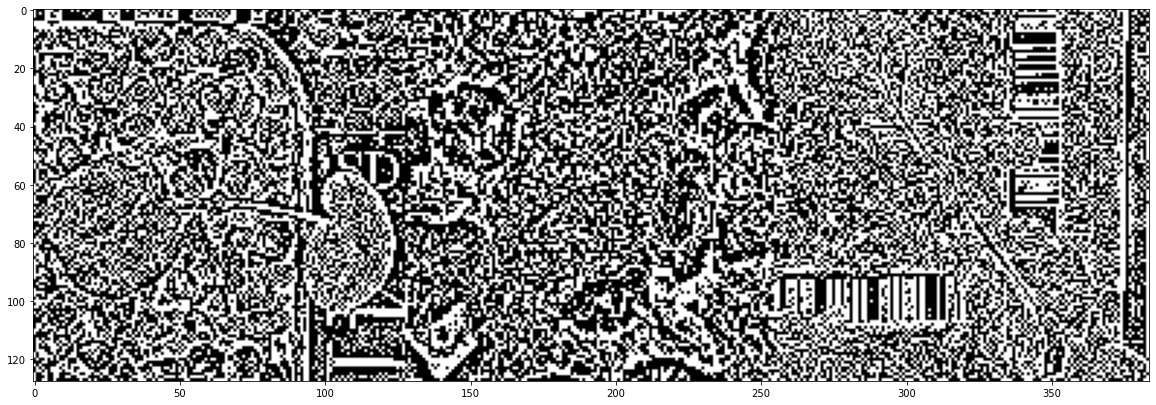

In [25]:
fig = plt.figure(figsize=(20, 8))
fig.set_size_inches(20, 8)

laplacian1=cv2.Laplacian(images_grayscale[2],cv2.CV_64F)
laplacian2=cv2.Laplacian(images_grayscale[1376],cv2.CV_64F)
laplacian3=cv2.Laplacian(images_grayscale[2218],cv2.CV_64F)

laplacian_all=cv2.hconcat((laplacian1,laplacian2,laplacian3))

plt.imshow(laplacian_all)




The image above is the output we get after applying the **Laplacian Filter** over the input image.
The Background noise will make it hard to detect the image well.

### **2. HSV Conversion**

<function matplotlib.pyplot.show>

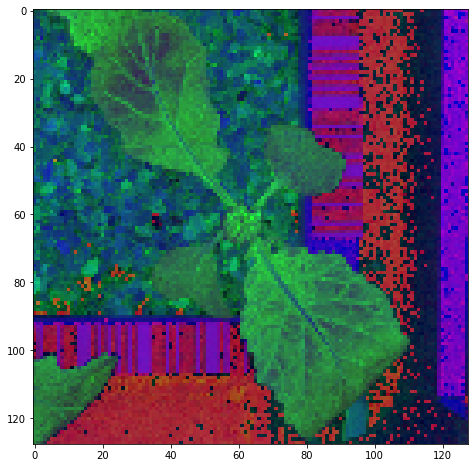

In [27]:
fig = plt.figure(figsize=(16, 8))
fig.set_size_inches(16, 8)

img_hsv = cv2.cvtColor(images[2218], cv2.COLOR_RGB2HSV)

plt.imshow(img_hsv)
plt.show

- Here, the **cv2.COLOR_RGB2HSV** conversion code is used in the **cvtColor()** function to convert our image to the HSV color scheme.
- The HSV color scheme finds great use in performance-critical Computer Vision tasks, such as object detection for images with poor lighting, because the various objects in an image may not be clearly distinguishable in normal RGB colors, and the HSV color scheme enhances the ability to detect separate entities and patterns in such images.

### **3. Brightness**
- Increasing the contrast of an image increases the difference between the light and dark areas of the picture. Decreasing the contrast, on the other hand, makes the picture look a little washed out. Finding the right contrast of an image can sometimes be a useful hyperparameter to tune in maximimzing the performance of our Deep Learning models. 

- The brightness of an image is changed by manipulating its pixel values. The greater the pixel value, the closer it is towards white and the brighter it will be. Conversely, making pixel values smaller will make them darker. Adjusting the brightness of a pixel is as simple as adding a variable value to each pixel's intensity value.

- Contrast and Brightness are often used in object detection and image segmentation tasks in Computer Vision, to make the edges of objects more clear by exaggerating neighbor pixel intensity differences.

In [29]:
def brightness_contrast(img, alpha = 0, beta = 0):
    # alpha Contrast control (1.0-3.0)
    # beta Brightness control (0-100)

    adjusted = cv2.convertScaleAbs(img, alpha=alpha, beta=beta)
    return adjusted


<function matplotlib.pyplot.show>

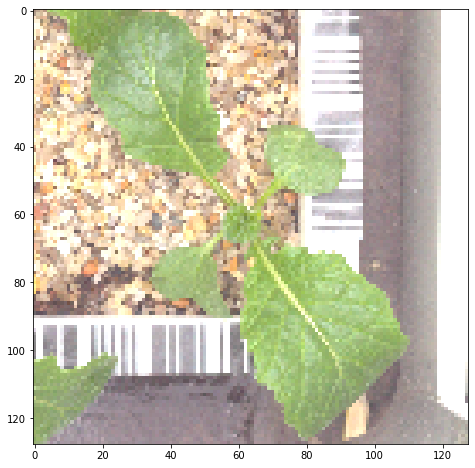

In [30]:
fig = plt.figure(figsize=(16, 8))
fig.set_size_inches(16, 8)

new_img = brightness_contrast(images[2218], 2, 50)

plt.imshow(new_img)
plt.show



## **4. Visualizing images using Gaussian Blur** 

In [31]:
# Applying Gaussian Blur to denoise the images
images_gb=[]
for i in range(len(images)):
  images_gb.append(cv2.GaussianBlur(images[i], ksize =(3,3),sigmaX =  0))

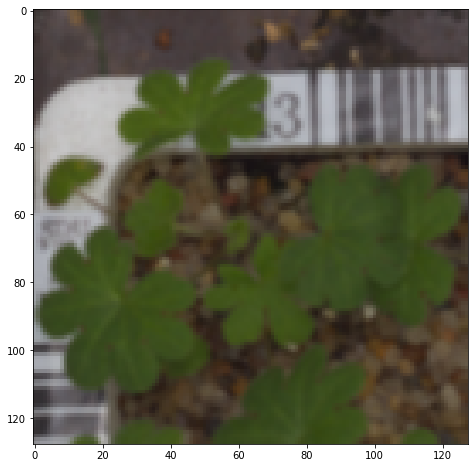

In [32]:
fig = plt.figure(figsize=(16, 8))
fig.set_size_inches(16, 8)

plt.imshow(images_gb[3])

- It appears that GaussianBlur would be ineffective because the blurred or denoised image does not seem to contain any relevant information, and the model would struggle to categorize these blurred images.

## **4. Resizing images** 
As the size of the images is large, it may be computationally expensive to train on these larger images; therefore, it is preferable to reduce the image size from 128 to 64.

In [33]:
images_decreased=[]
height = 64
width = 64
dimensions = (width, height)  
for i in range(len(images)):
  images_decreased.append( cv2.resize(images[i], dimensions, interpolation=cv2.INTER_LINEAR))

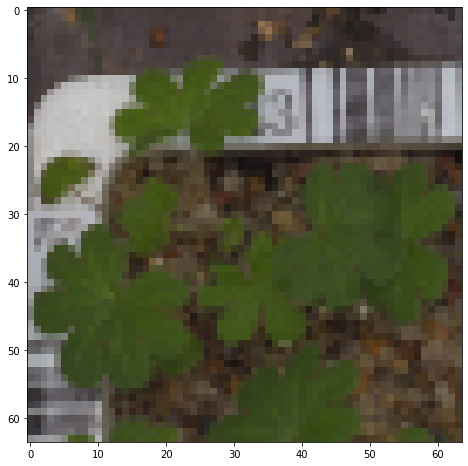

In [34]:
fig = plt.figure(figsize=(16, 8))
fig.set_size_inches(16, 8)

plt.imshow(images_decreased[3])

## **5. Checking for imbalance Data**

In [7]:
labels['Label'].value_counts(normalize=True)

Loose Silky-bent             0.137684
Common Chickweed             0.128632
Scentless Mayweed            0.108632
Small-flowered Cranesbill    0.104421
Fat Hen                      0.100000
Charlock                     0.082105
Sugar beet                   0.081053
Cleavers                     0.060421
Black-grass                  0.055368
Shepherds Purse              0.048632
Common wheat                 0.046526
Maize                        0.046526
Name: Label, dtype: float64

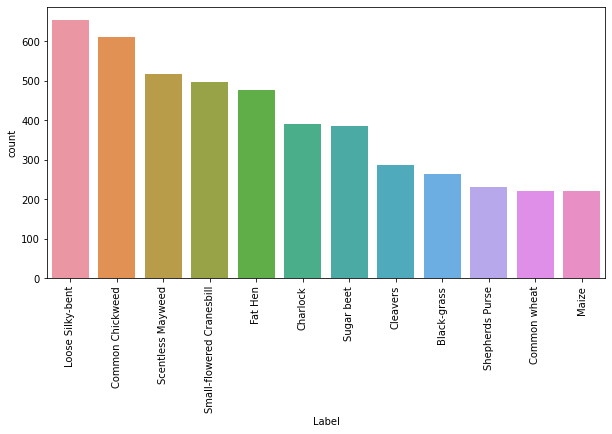

In [8]:
fig = plt.figure(figsize=(10, 5))
sns.countplot(data=labels, x='Label', 
              order = labels['Label'].value_counts().index
              )

plt.xticks(rotation=90)
plt.show()

* As it is obviouse from above plot, the data is unbalance
* The most common species is Loose Silky-bent while Maize is the lowest.

## **EDA Analysis Summary** 

**After careful EDA analysis on data, the conclusion is as following:**

* The images are dark . So in first step the brightness is increased. These dataset will be used to make the first model (Model1_1) to see the prediction accuracy percentage. 

* Then after that, due to lots of noise on background and overfitting problem (after running Model1_1), the gaussian filter applied on the data to decrease the effect of background noise (Model1_2)

* Then to decrease the run time and increase the model efficency, the data size is decreased to 64px to 64px (Model1_3)

* Ad the label data are unbalanced, the weights are calculated and tried to make the balance in training set. 

* The above procedure are shown in below figures one after other. 

## **Original Image**

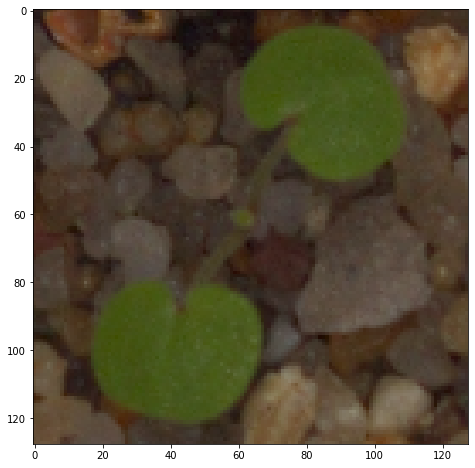

In [17]:
fig = plt.figure(figsize=(16, 8))
fig.set_size_inches(16, 8)

plt.imshow(images[5])

## **Brightness on Original Image**

In [18]:
# Applying Brightness to the hsv images
adjusted_brightness=[]
for i in range(len(images)):
  adjusted_brightness.append(cv2.convertScaleAbs(images[i], alpha=3, beta=10))


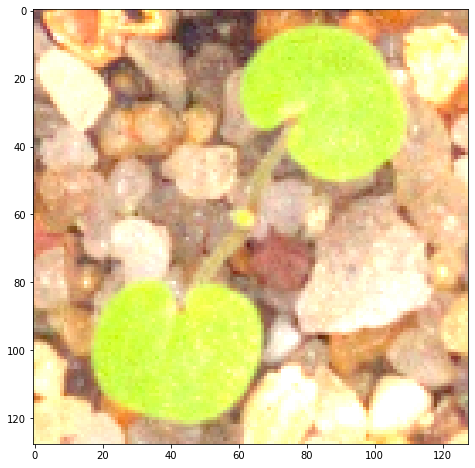

In [19]:
fig = plt.figure(figsize=(16, 8))
fig.set_size_inches(16, 8)

plt.imshow(adjusted_brightness[5])

## **Bluring on Brighted Image**

In [20]:
# Applying Gaussian Blur to denoise the images
images_gb=[]
for i in range(len(images)):
  images_gb.append(cv2.GaussianBlur(adjusted_brightness[i], ksize =(9,9),sigmaX =  0))

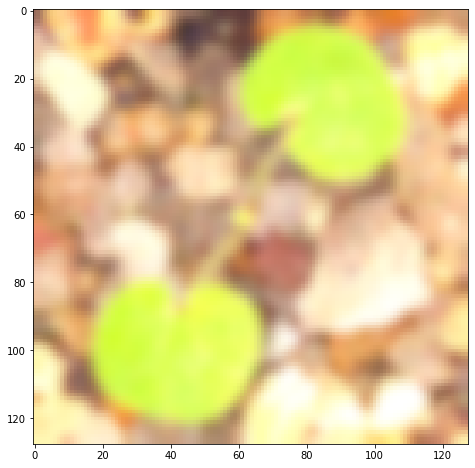

In [21]:
fig = plt.figure(figsize=(16, 8))
fig.set_size_inches(16, 8)

plt.imshow(images_gb[5])

## **Decreased size of Brighted+Blured Image**

In [22]:
# Decrease the image size
images_decreased=[]
height = 64
width = 64
dimensions = (width, height)  
for i in range(len(images)):
  images_decreased.append( cv2.resize(images_gb[i], dimensions, interpolation=cv2.INTER_LINEAR))

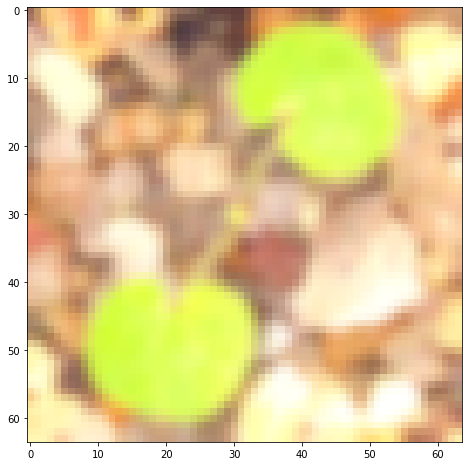

In [23]:
fig = plt.figure(figsize=(16, 8))
fig.set_size_inches(16, 8)

plt.imshow(images_decreased[5])

# **Model Building**

## **Splitting the dataset**

- As we have good number of images in our dataset, we will use 20% of our data for testing, 20% of our data for validation and 60% of our data for training.
- We are using the train_test_split() function from scikit-learn. Here, we split the dataset into three parts, train,test and validation.

## **Model1_1**

A simple model with just **BRIGHTNESS** applied on data. 

In [24]:
from sklearn.model_selection import train_test_split
X_temp, X_test, y_temp, y_test = train_test_split(np.array(adjusted_brightness),labels , test_size=0.2, random_state=1,stratify=labels)
X_train, X_val, y_train, y_val = train_test_split(X_temp,y_temp , test_size=0.2, random_state=1,stratify=y_temp)

In [25]:
print(X_train.shape,y_train.shape)
print(X_val.shape,y_val.shape)
print(X_test.shape,y_test.shape)

(3040, 128, 128, 3) (3040, 1)
(760, 128, 128, 3) (760, 1)
(950, 128, 128, 3) (950, 1)


In [26]:
# Find each class weight to be used for splitting the data in train and test sets

from sklearn.utils import class_weight

labelList = labels.Label.unique()
class_weights = class_weight.compute_class_weight(class_weight = "balanced",
                                                  classes = np.array(labelList),
                                                  y = y_train.values.reshape(-1)
                                                  )
class_weights = dict(zip(np.array(range(len(labelList))), class_weights))

#print calculated class weights
class_weights

{0: 0.7966457023060797,
 1: 0.8333333333333334,
 2: 1.7117117117117118,
 3: 1.784037558685446,
 4: 0.6479113384484229,
 5: 1.0133333333333334,
 6: 1.384335154826958,
 7: 0.7676767676767676,
 8: 1.029810298102981,
 9: 1.784037558685446,
 10: 1.507936507936508,
 11: 0.6060606060606061}


## **Making the data compatible:**

- Convert labels from names to one hot vectors
- Normalizing the values

### **Encoding the target labels**

In [27]:
# Convert labels from names to one hot vectors.
# We have already used encoding methods like onehotencoder and labelencoder, als another method called labelBinarizer.
# Labelbinarizer works similar to onehotencoder 

from sklearn.preprocessing import LabelBinarizer
enc = LabelBinarizer()
y_train_encoded = enc.fit_transform(y_train)
y_val_encoded=enc.transform(y_val)
y_test_encoded=enc.transform(y_test)

## **Data Normalization**
Since the **image pixel values range from 0-255**, our method of normalization here will be **scaling** - we shall **divide all the pixel values by 255 to standardize the images to have values between 0-1.**

In [110]:
# Normalizing the image pixels
X_train_normalized = X_train.astype('float32')/255.0
X_val_normalized = X_val.astype('float32')/255.0
X_test_normalized = X_test.astype('float32')/255.0

## **Model Building - Convolutional Neural Network (CNN)**
Let's create a CNN model sequentially, where we will be adding the layers one after another.

A **CNN Model** will be built with the following 2 main parts - <br>

1. **The Feature Extraction layers** which are comprised of convolutional and pooling layers.
2. **The Fully Connected classification layers** for prediction.<br><br>

First, we need to clear the previous model's history from the session even if a single model can run multiple times on the same data. 

In Keras, we need a special command to clear the model's history, otherwise the previous model history remains in the backend.

Also, let's fix the seed again after clearing the backend.

Let's **set the seed for random number generators in Numpy, the Random library in Python, and in TensorFlow** to be able to reproduce the same results every time we run the code.

In [111]:
# Clearing backend
backend.clear_session()

# Fixing the seed for random number generators
import random
np.random.seed(1)
random.seed(1)
tf.random.set_seed(1)

In [112]:
# Intializing a sequential model
model1_1 = Sequential()

# Adding first conv layer with 64 filters and kernel size 3x3 , padding 'same' provides the output size same as the input size
# Input_shape denotes input image dimension of images
model1_1.add(Conv2D(64, (3, 3), activation='relu', padding="same", input_shape=(128, 128, 3)))

# Adding max pooling to reduce the size of output of first conv layer
model1_1.add(MaxPooling2D((2, 2), padding = 'same'))

# Adding second conv layer
model1_1.add(Conv2D(32, (3, 3), activation='relu', padding="same"))
model1_1.add(MaxPooling2D((2, 2), padding = 'same'))

# flattening the output of the conv layer after max pooling to make it ready for creating dense connections
model1_1.add(Flatten())

# Adding a fully connected dense layer with 100 neurons    
model1_1.add(Dense(16, activation='relu'))

# Adding the output layer with 12 neurons and activation functions as softmax since this is a multi-class classification problem  
model1_1.add(Dense(12, activation='softmax'))

# Using Adam Optimizer
opt=Adam()

# Compile model
model1_1.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

# Generating the summary of the model
model1_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 64, 64, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 64, 32)        18464     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 32, 32, 32)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 32768)             0         
                                                                 
 dense (Dense)               (None, 16)                5

In [113]:
history1_1 = model1_1.fit(
              X_train_normalized, y_train_encoded,
              epochs=50,
              validation_data=(X_val_normalized,y_val_encoded),
              batch_size=32,
              verbose=2
)

Epoch 1/50
95/95 - 3s - loss: 2.4871 - accuracy: 0.1319 - val_loss: 2.4343 - val_accuracy: 0.1579 - 3s/epoch - 29ms/step
Epoch 2/50
95/95 - 2s - loss: 2.3926 - accuracy: 0.1803 - val_loss: 2.3154 - val_accuracy: 0.2671 - 2s/epoch - 21ms/step
Epoch 3/50
95/95 - 2s - loss: 2.2747 - accuracy: 0.2434 - val_loss: 2.2169 - val_accuracy: 0.2263 - 2s/epoch - 22ms/step
Epoch 4/50
95/95 - 2s - loss: 2.1690 - accuracy: 0.2622 - val_loss: 2.1153 - val_accuracy: 0.3079 - 2s/epoch - 21ms/step
Epoch 5/50
95/95 - 2s - loss: 2.0620 - accuracy: 0.3158 - val_loss: 1.9862 - val_accuracy: 0.3461 - 2s/epoch - 21ms/step
Epoch 6/50
95/95 - 2s - loss: 1.9780 - accuracy: 0.3355 - val_loss: 1.9079 - val_accuracy: 0.3539 - 2s/epoch - 21ms/step
Epoch 7/50
95/95 - 2s - loss: 1.8948 - accuracy: 0.3487 - val_loss: 1.8290 - val_accuracy: 0.3474 - 2s/epoch - 21ms/step
Epoch 8/50
95/95 - 2s - loss: 1.8377 - accuracy: 0.3589 - val_loss: 1.8135 - val_accuracy: 0.3592 - 2s/epoch - 21ms/step
Epoch 9/50
95/95 - 2s - loss: 1.

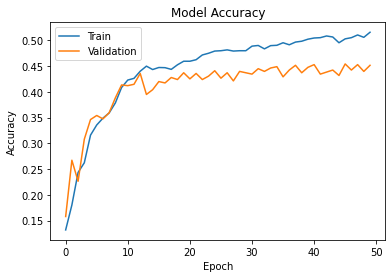

In [114]:
plt.plot(history1_1.history['accuracy'])
plt.plot(history1_1.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

**Observations:** 


*   We can see from the above plot that **the training accuracy of the  model was good but the validation accuracy was not good.**
*   The model seems to overfit on the data.

### **Evaluating the model on test data**

In [115]:
accuracy = model1_1.evaluate(X_test_normalized, y_test_encoded, verbose=2)

30/30 - 0s - loss: 1.7432 - accuracy: 0.4368 - 326ms/epoch - 11ms/step


### **Generating the predictions using test data**

In [116]:
# Here we would get the output as probablities for each category
y_pred1_1=model1_1.predict(X_test_normalized)

### **Plotting the Confusion Matrix**

*   The Confusion matrix is also defined as an inbuilt function in the TensorFlow module, so we can use that for evaluating the classification model.
*   The Confusion matrix expects categorical data as input. However, y_test_encoded is an encoded value, whereas y_pred has probabilities. So,we must retrieve the categorical values from the encoded values.
*   We will use the `argmax()` function to obtain the maximum value over each category on both y_test_encoded and y_pred and obtain their respective classes.





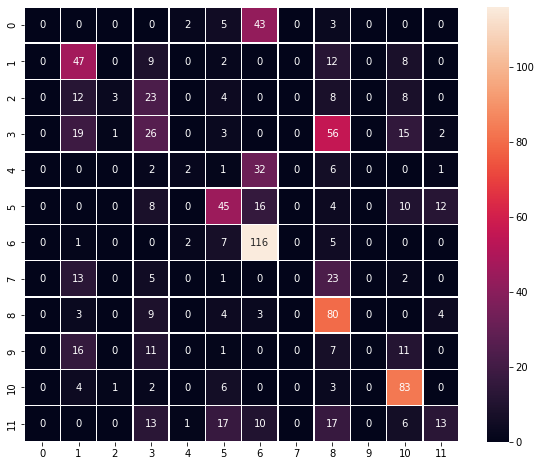

In [117]:
# Obtaining the categorical values from y_test_encoded and y_pred
y_pred1_1arg=np.argmax(y_pred1_1,axis=1)
y_test_arg=np.argmax(y_test_encoded,axis=1)

# Plotting the Confusion Matrix using confusion matrix() function which is also predefined tensorflow module
confusion_matrix = tf.math.confusion_matrix(y_test_arg,y_pred1_1arg)
f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(
    confusion_matrix,
    annot=True,
    linewidths=.4,
    fmt="d",
    square=True,
    ax=ax
)
plt.show()

<b> Observations</b><br>
- We observe that some of the classes are not predicted correctly. 
- In comparison to the rest, we can see that classes 1, 5, 6, and 10 are well classified.
- We can also observe that classes 0, 2, 3, 4, 7, 9 and 11 are mostly misclassified.

## **Metrics classification report** 
**Model 1_1**

In [118]:
#Accuracy as per the classification report 

cr=metrics.classification_report(y_test_arg,y_pred1_1arg)
print(cr)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        53
           1       0.41      0.60      0.49        78
           2       0.60      0.05      0.10        58
           3       0.24      0.21      0.23       122
           4       0.29      0.05      0.08        44
           5       0.47      0.47      0.47        95
           6       0.53      0.89      0.66       131
           7       0.00      0.00      0.00        44
           8       0.36      0.78      0.49       103
           9       0.00      0.00      0.00        46
          10       0.58      0.84      0.69        99
          11       0.41      0.17      0.24        77

    accuracy                           0.44       950
   macro avg       0.32      0.34      0.29       950
weighted avg       0.37      0.44      0.36       950



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## **Model1_2**

A simple model with **BRIGHTNESS**  + **GAUSSIAN BLUR** applied on data. 

In [119]:
from sklearn.model_selection import train_test_split
X_temp, X_test, y_temp, y_test = train_test_split(np.array(images_gb),labels , test_size=0.2, random_state=1,stratify=labels)
X_train, X_val, y_train, y_val = train_test_split(X_temp,y_temp , test_size=0.2, random_state=1,stratify=y_temp)

In [120]:
print(X_train.shape,y_train.shape)
print(X_val.shape,y_val.shape)
print(X_test.shape,y_test.shape)

(3040, 128, 128, 3) (3040, 1)
(760, 128, 128, 3) (760, 1)
(950, 128, 128, 3) (950, 1)


In [121]:
# Find each class weight to be used for splitting the data in train and test sets

from sklearn.utils import class_weight

labelList = labels.Label.unique()
class_weights = class_weight.compute_class_weight(class_weight = "balanced",
                                                  classes = np.array(labelList),
                                                  y = y_train.values.reshape(-1)
                                                  )
class_weights = dict(zip(np.array(range(len(labelList))), class_weights))

#print calculated class weights
class_weights

{0: 0.7966457023060797,
 1: 0.8333333333333334,
 2: 1.7117117117117118,
 3: 1.784037558685446,
 4: 0.6479113384484229,
 5: 1.0133333333333334,
 6: 1.384335154826958,
 7: 0.7676767676767676,
 8: 1.029810298102981,
 9: 1.784037558685446,
 10: 1.507936507936508,
 11: 0.6060606060606061}


## **Making the data compatible:**

In [122]:
# Convert labels from names to one hot vectors.
# We have already used encoding methods like onehotencoder and labelencoder, als another method called labelBinarizer.
# Labelbinarizer works similar to onehotencoder 

from sklearn.preprocessing import LabelBinarizer
enc = LabelBinarizer()
y_train_encoded = enc.fit_transform(y_train)
y_val_encoded=enc.transform(y_val)
y_test_encoded=enc.transform(y_test)

## **Data Normalization**

In [123]:
# Normalizing the image pixels
X_train_normalized = X_train.astype('float32')/255.0
X_val_normalized = X_val.astype('float32')/255.0
X_test_normalized = X_test.astype('float32')/255.0

In [124]:
# Clearing backend
backend.clear_session()

# Fixing the seed for random number generators
import random
np.random.seed(1)
random.seed(1)
tf.random.set_seed(1)

In [125]:
# Intializing a sequential model
model1_2 = Sequential()

# Adding first conv layer with 64 filters and kernel size 3x3 , padding 'same' provides the output size same as the input size
# Input_shape denotes input image dimension of images
model1_2.add(Conv2D(64, (3, 3), activation='relu', padding="same", input_shape=(128, 128, 3)))

# Adding max pooling to reduce the size of output of first conv layer
model1_2.add(MaxPooling2D((2, 2), padding = 'same'))

# Adding second conv layer
model1_2.add(Conv2D(32, (3, 3), activation='relu', padding="same"))
model1_2.add(MaxPooling2D((2, 2), padding = 'same'))

# flattening the output of the conv layer after max pooling to make it ready for creating dense connections
model1_2.add(Flatten())

# Adding a fully connected dense layer with 100 neurons    
model1_2.add(Dense(16, activation='relu'))

# Adding the output layer with 12 neurons and activation functions as softmax since this is a multi-class classification problem  
model1_2.add(Dense(12, activation='softmax'))

# Using Adam Optimizer
opt=Adam()

# Compile model
model1_2.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

# Generating the summary of the model
model1_2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 64, 64, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 64, 32)        18464     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 32, 32, 32)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 32768)             0         
                                                                 
 dense (Dense)               (None, 16)                5

In [126]:
history1_2 = model1_2.fit(
              X_train_normalized, y_train_encoded,
              epochs=50,
              validation_data=(X_val_normalized,y_val_encoded),
              batch_size=32,
              verbose=2
)

Epoch 1/50
95/95 - 3s - loss: 2.4815 - accuracy: 0.1322 - val_loss: 2.4378 - val_accuracy: 0.1316 - 3s/epoch - 28ms/step
Epoch 2/50
95/95 - 2s - loss: 2.3802 - accuracy: 0.1773 - val_loss: 2.2871 - val_accuracy: 0.2289 - 2s/epoch - 21ms/step
Epoch 3/50
95/95 - 2s - loss: 2.1924 - accuracy: 0.2484 - val_loss: 2.1167 - val_accuracy: 0.2816 - 2s/epoch - 21ms/step
Epoch 4/50
95/95 - 2s - loss: 2.0496 - accuracy: 0.3039 - val_loss: 1.9830 - val_accuracy: 0.3566 - 2s/epoch - 21ms/step
Epoch 5/50
95/95 - 2s - loss: 1.9350 - accuracy: 0.3507 - val_loss: 1.8703 - val_accuracy: 0.3461 - 2s/epoch - 21ms/step
Epoch 6/50
95/95 - 2s - loss: 1.8434 - accuracy: 0.3720 - val_loss: 1.7991 - val_accuracy: 0.3776 - 2s/epoch - 21ms/step
Epoch 7/50
95/95 - 2s - loss: 1.7554 - accuracy: 0.3914 - val_loss: 1.7086 - val_accuracy: 0.3934 - 2s/epoch - 21ms/step
Epoch 8/50
95/95 - 2s - loss: 1.6928 - accuracy: 0.3941 - val_loss: 1.6828 - val_accuracy: 0.4105 - 2s/epoch - 21ms/step
Epoch 9/50
95/95 - 2s - loss: 1.

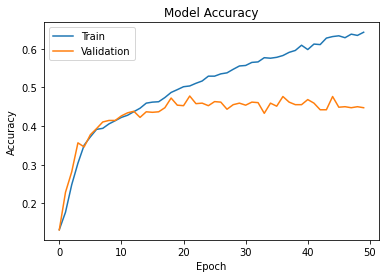

In [127]:
plt.plot(history1_2.history['accuracy'])
plt.plot(history1_2.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

**Observations:** 


*   We can see from the above plot that **the training accuracy of the  model was good but the validation accuracy was not good.**
*  Model model1_2 is improved respect to the Model1_1.
*   The model still overfited on the data.

### **Evaluating the model on Test data**

In [128]:
accuracy = model1_2.evaluate(X_test_normalized, y_test_encoded, verbose=2)

30/30 - 0s - loss: 2.3492 - accuracy: 0.4495 - 325ms/epoch - 11ms/step


### **Comparing the prediction using Test data**

In [129]:
# Here we would get the output as probablities for each category
y_pred1_2=model1_2.predict(X_test_normalized)

### **Ploting the confusion matrix**

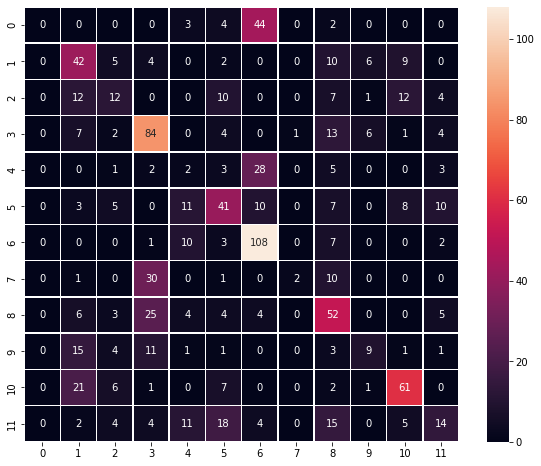

In [130]:
# Obtaining the categorical values from y_test_encoded and y_pred
y_pred1_2arg=np.argmax(y_pred1_2,axis=1)
y_test_arg=np.argmax(y_test_encoded,axis=1)

# Plotting the Confusion Matrix using confusion matrix() function which is also predefined tensorflow module
confusion_matrix = tf.math.confusion_matrix(y_test_arg,y_pred1_2arg)
f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(
    confusion_matrix,
    annot=True,
    linewidths=.4,
    fmt="d",
    square=True,
    ax=ax
)
plt.show()

<b> Observations</b><br>
- We observe that some of the classes are not predicted correctly. 
- In comparison to the rest, we can see that classes 1, 3, 5, 6, 8, and 10 are well classified.
- We can also observe that classes 0, 2, 4, 7, and 9 are mostly misclassified.

## **Metrics classification report** 
**Model 1_2**

In [131]:
#Accuracy as per the classification report 

cr=metrics.classification_report(y_test_arg,y_pred1_2arg)
print(cr)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        53
           1       0.39      0.54      0.45        78
           2       0.29      0.21      0.24        58
           3       0.52      0.69      0.59       122
           4       0.05      0.05      0.05        44
           5       0.42      0.43      0.42        95
           6       0.55      0.82      0.66       131
           7       0.67      0.05      0.09        44
           8       0.39      0.50      0.44       103
           9       0.39      0.20      0.26        46
          10       0.63      0.62      0.62        99
          11       0.33      0.18      0.23        77

    accuracy                           0.45       950
   macro avg       0.38      0.36      0.34       950
weighted avg       0.42      0.45      0.41       950



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## **Model1_3**

A simple model with **BRIGHTNESS**  + **GAUSSIAN BLUR** + **DECREASE IMAGE SIZE** applied on data. 

In [26]:
from sklearn.model_selection import train_test_split
X_temp, X_test, y_temp, y_test = train_test_split(np.array(images_decreased),labels , test_size=0.2, random_state=1,stratify=labels)
X_train, X_val, y_train, y_val = train_test_split(X_temp,y_temp , test_size=0.2, random_state=1,stratify=y_temp)

In [27]:
print(X_train.shape,y_train.shape)
print(X_val.shape,y_val.shape)
print(X_test.shape,y_test.shape)

(3040, 64, 64, 3) (3040, 1)
(760, 64, 64, 3) (760, 1)
(950, 64, 64, 3) (950, 1)


In [28]:
# Find each class weight to be used for splitting the data in train and test sets

from sklearn.utils import class_weight

labelList = labels.Label.unique()
class_weights = class_weight.compute_class_weight(class_weight = "balanced",
                                                  classes = np.array(labelList),
                                                  y = y_train.values.reshape(-1)
                                                  )
class_weights = dict(zip(np.array(range(len(labelList))), class_weights))

#print calculated class weights
class_weights

{0: 0.7966457023060797,
 1: 0.8333333333333334,
 2: 1.7117117117117118,
 3: 1.784037558685446,
 4: 0.6479113384484229,
 5: 1.0133333333333334,
 6: 1.384335154826958,
 7: 0.7676767676767676,
 8: 1.029810298102981,
 9: 1.784037558685446,
 10: 1.507936507936508,
 11: 0.6060606060606061}

### **Making Data Compatable**

In [29]:
# Convert labels from names to one hot vectors.
# We have already used encoding methods like onehotencoder and labelencoder, als another method called labelBinarizer.
# Labelbinarizer works similar to onehotencoder 

from sklearn.preprocessing import LabelBinarizer
enc = LabelBinarizer()
y_train_encoded = enc.fit_transform(y_train)
y_val_encoded=enc.transform(y_val)
y_test_encoded=enc.transform(y_test)

## **Data Normalization**

In [30]:
# Normalizing the image pixels
X_train_normalized = X_train.astype('float32')/255.0
X_val_normalized = X_val.astype('float32')/255.0
X_test_normalized = X_test.astype('float32')/255.0

In [31]:
# Clearing backend
backend.clear_session()

# Fixing the seed for random number generators
import random
np.random.seed(1)
random.seed(1)
tf.random.set_seed(1)

In [32]:
# Intializing a sequential model
model1_3 = Sequential()

# Adding first conv layer with 64 filters and kernel size 3x3 , padding 'same' provides the output size same as the input size
# Input_shape denotes input image dimension of images
model1_3.add(Conv2D(64, (3, 3), activation='relu', padding="same", input_shape=(64, 64, 3)))

# Adding max pooling to reduce the size of output of first conv layer
model1_3.add(MaxPooling2D((2, 2), padding = 'same'))

# Adding second conv layer
model1_3.add(Conv2D(32, (3, 3), activation='relu', padding="same"))
model1_3.add(MaxPooling2D((2, 2), padding = 'same'))

# flattening the output of the conv layer after max pooling to make it ready for creating dense connections
model1_3.add(Flatten())

# Adding a fully connected dense layer with 100 neurons    
model1_3.add(Dense(16, activation='relu'))

# Adding the output layer with 12 neurons and activation functions as softmax since this is a multi-class classification problem  
model1_3.add(Dense(12, activation='softmax'))

# Using Adam Optimizer
opt=Adam()

# Compile model
model1_3.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

# Generating the summary of the model
model1_3.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 64)        1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 32, 32, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        18464     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 8192)              0         
                                                                 
 dense (Dense)               (None, 16)                1

In [33]:
history1_3 = model1_3.fit(
              X_train_normalized, y_train_encoded,
              epochs=50,
              validation_data=(X_val_normalized,y_val_encoded),
              batch_size=32,
              verbose=2
)

Epoch 1/50
95/95 - 2s - loss: 2.3937 - accuracy: 0.1859 - val_loss: 2.2332 - val_accuracy: 0.3000 - 2s/epoch - 17ms/step
Epoch 2/50
95/95 - 1s - loss: 1.9784 - accuracy: 0.3526 - val_loss: 1.8982 - val_accuracy: 0.3632 - 664ms/epoch - 7ms/step
Epoch 3/50
95/95 - 1s - loss: 1.7098 - accuracy: 0.4066 - val_loss: 1.5883 - val_accuracy: 0.4618 - 668ms/epoch - 7ms/step
Epoch 4/50
95/95 - 1s - loss: 1.5106 - accuracy: 0.4753 - val_loss: 1.4109 - val_accuracy: 0.5026 - 621ms/epoch - 7ms/step
Epoch 5/50
95/95 - 1s - loss: 1.3650 - accuracy: 0.5220 - val_loss: 1.3362 - val_accuracy: 0.5368 - 608ms/epoch - 6ms/step
Epoch 6/50
95/95 - 1s - loss: 1.2957 - accuracy: 0.5395 - val_loss: 1.2452 - val_accuracy: 0.5882 - 678ms/epoch - 7ms/step
Epoch 7/50
95/95 - 1s - loss: 1.1460 - accuracy: 0.5921 - val_loss: 1.1717 - val_accuracy: 0.5934 - 667ms/epoch - 7ms/step
Epoch 8/50
95/95 - 1s - loss: 1.1025 - accuracy: 0.6112 - val_loss: 1.2708 - val_accuracy: 0.5789 - 603ms/epoch - 6ms/step
Epoch 9/50
95/95 -

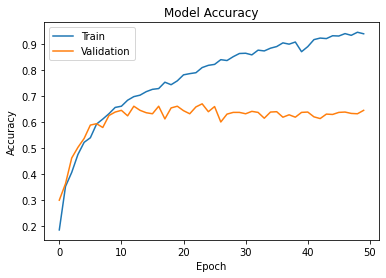

In [34]:
plt.plot(history1_3.history['accuracy'])
plt.plot(history1_3.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

## **Evaluating the model on Test data**

In [35]:
accuracy = model1_3.evaluate(X_test_normalized, y_test_encoded, verbose=2)

30/30 - 0s - loss: 2.3229 - accuracy: 0.6253 - 138ms/epoch - 5ms/step


## **Generating prediction using Test data**

In [36]:
# Here we would get the output as probablities for each category
y_pred1_3=model1_3.predict(X_test_normalized)

## **Ploting the confision Matrix**

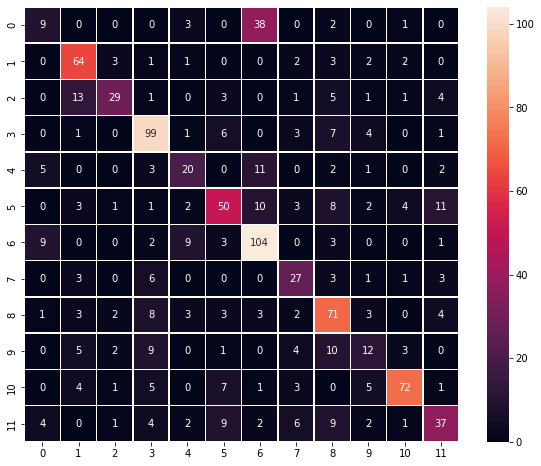

In [38]:
# Obtaining the categorical values from y_test_encoded and y_pred
y_pred1_3arg=np.argmax(y_pred1_3,axis=1)
y_test_arg=np.argmax(y_test_encoded,axis=1)

# Plotting the Confusion Matrix using confusion matrix() function which is also predefined tensorflow module
confusion_matrix = tf.math.confusion_matrix(y_test_arg,y_pred1_3arg)
f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(
    confusion_matrix,
    annot=True,
    linewidths=.4,
    fmt="d",
    square=True,
    ax=ax
)
plt.show()

<b> Observations</b><br>
- We observe that some of the classes are not predicted correctly. 
- In comparison to the rest, we can see that classes 1, 3, 5, 7, and 8 are well classified.
- We can also observe that classes 0, 4 9, and 11 are mostly misclassified.

## **Metrics classification report** 
**Model 1_3**

In [39]:
#Accuracy as per the classification report 

cr=metrics.classification_report(y_test_arg,y_pred1_3arg)
print(cr)

              precision    recall  f1-score   support

           0       0.32      0.17      0.22        53
           1       0.67      0.82      0.74        78
           2       0.74      0.50      0.60        58
           3       0.71      0.81      0.76       122
           4       0.49      0.45      0.47        44
           5       0.61      0.53      0.56        95
           6       0.62      0.79      0.69       131
           7       0.53      0.61      0.57        44
           8       0.58      0.69      0.63       103
           9       0.36      0.26      0.30        46
          10       0.85      0.73      0.78        99
          11       0.58      0.48      0.52        77

    accuracy                           0.63       950
   macro avg       0.59      0.57      0.57       950
weighted avg       0.62      0.63      0.61       950



## **Visualizing the prediction:**

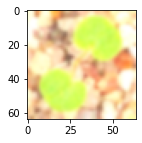

Predicted Label ['Small-flowered Cranesbill']
True Label Small-flowered Cranesbill


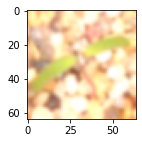

Predicted Label ['Common wheat']
True Label Fat Hen


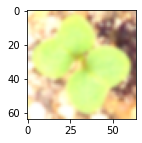

Predicted Label ['Charlock']
True Label Charlock


In [40]:
# Visualizing the predicted and correct label of images from test data
plt.figure(figsize=(2,2))
plt.imshow(X_test[2])
plt.show()
print('Predicted Label', enc.inverse_transform(model1_3.predict((X_test_normalized[2].reshape(1,64,64,3)))))      # reshaping the input image as we are only trying to predict using a single image
print('True Label', enc.inverse_transform(y_test_encoded)[2])                                                     # using inverse_transform() to get the output label from the output vector

plt.figure(figsize=(2,2))
plt.imshow(X_test[100])
plt.show()
print('Predicted Label', enc.inverse_transform(model1_3.predict((X_test_normalized[100].reshape(1,64,64,3)))))    # reshaping the input image as we are only trying to predict using a single image
print('True Label', enc.inverse_transform(y_test_encoded)[100])                                                    # using inverse_transform() to get the output label from the output vector
 
plt.figure(figsize=(2,2))
plt.imshow(X_test[850])
plt.show()
print('Predicted Label', enc.inverse_transform(model1_3.predict((X_test_normalized[850].reshape(1,64,64,3)))))    # reshaping the input image as we are only trying to predict using a single image
print('True Label', enc.inverse_transform(y_test_encoded)[850]) 

## **Model-2**

As we can see, previous model appears to overfit. Therefore we'll try to address this problem with data augmentation and Batch Normalization to check if we can improve the model's performance.

## **Data Augmentation**

In most of the real-world case studies, it is challenging to acquire a large number of images and then train CNNs. To overcome this problem, one approach we might consider is **Data Augmentation**. CNNs have the property of **translational invariance**, which means they can recognise an object even if its appearance shifts translationally in some way. <br> Taking this attribute into account, we can augment the images using the techniques listed below - <br>
**1. Horizontal Flip** (should be set to True/False) <br>
**2. Vertical Flip** (should be set to True/False) <br>
**3. Height Shift** (should be between 0 and 1) <br>
**4. Width Shift** (should be between 0 and 1) <br>
**5. Rotation** (should be between 0 and 180) <br>
**6. Shear** (should be between 0 and 1) <br>
**7. Zoom** (should be between 0 and 1) etc. <br>


In [54]:
# Clearing backend
backend.clear_session()

# Fixing the seed for random number generators
import random
np.random.seed(1)
random.seed(1)
tf.random.set_seed(1)

In [55]:
train_datagen = ImageDataGenerator(#rescale=1.0 / 255.0,
                              horizontal_flip = False,
                              vertical_flip = False, 
                              #height_shift_range= 0.1, 
                              width_shift_range=0.1, 
                              rotation_range=20, 
                              shear_range = 0.1,
                              #zoom_range=0.1,
                              #fill_mode='nearest',
)

In [43]:
# Intializing a sequential model
model2 = Sequential()

# Adding first conv layer with 64 filters and kernel size 3x3 , padding 'same' provides the output size same as the input size
# Input_shape denotes input image dimension of images
model2.add(Conv2D(64, (3, 3), activation='relu', padding="same", input_shape=(64, 64, 3)))


# Adding max pooling to reduce the size of output of first conv layer
model2.add(MaxPooling2D((2, 2), padding = 'same'))


# Adding second conv layer
model2.add(Conv2D(32, (3, 3), activation='relu', padding="same"))
model2.add(MaxPooling2D((2, 2), padding = 'same'))


# flattening the output of the conv layer after max pooling to make it ready for creating dense connections
model2.add(Flatten())

# Adding a fully connected dense layer with 100 neurons    
model2.add(Dense(16, activation='relu'))

# Adding the output layer with 12 neurons and activation functions as softmax since this is a multi-class classification problem  
model2.add(Dense(12, activation='softmax'))

# Using Adam Optimizer
opt=Adam()

# Compile model
model2.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

# Generating the summary of the model
model2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 64)        1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 32, 32, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        18464     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 8192)              0         
                                                                 
 dense (Dense)               (None, 16)                1

In [44]:
history_2 = model2.fit(train_datagen.flow(X_train_normalized,y_train_encoded,
                                       batch_size=64, 
                                       seed=1,
                                       shuffle=False),
                    epochs=100,
                    steps_per_epoch=X_train_normalized.shape[0] // 64,
                    validation_data=(X_val_normalized,y_val_encoded),
                    verbose=1, use_multiprocessing=True)

Epoch 1/100
47/47 [==============================] - 9s 170ms/step - loss: 2.4475 - accuracy: 0.1297 - val_loss: 2.3874 - val_accuracy: 0.1750
Epoch 2/100
47/47 [==============================] - 4s 75ms/step - loss: 2.2834 - accuracy: 0.2554 - val_loss: 2.0976 - val_accuracy: 0.3658
Epoch 3/100
47/47 [==============================] - 4s 76ms/step - loss: 2.0420 - accuracy: 0.3357 - val_loss: 1.8797 - val_accuracy: 0.3671
Epoch 4/100
47/47 [==============================] - 4s 76ms/step - loss: 1.8551 - accuracy: 0.3686 - val_loss: 1.7768 - val_accuracy: 0.3987
Epoch 5/100
47/47 [==============================] - 4s 76ms/step - loss: 1.7359 - accuracy: 0.3894 - val_loss: 1.6724 - val_accuracy: 0.4092
Epoch 6/100
47/47 [==============================] - 4s 75ms/step - loss: 1.6394 - accuracy: 0.4274 - val_loss: 1.5448 - val_accuracy: 0.4553
Epoch 7/100
47/47 [==============================] - 4s 76ms/step - loss: 1.5549 - accuracy: 0.4499 - val_loss: 1.5576 - val_accuracy: 0.4553
Epoch

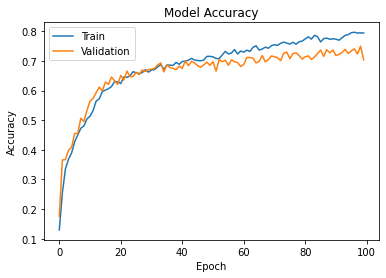

In [45]:
plt.plot(history_2.history['accuracy'])
plt.plot(history_2.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

### **Evaluating the model on test data**

In [46]:
accuracy2 = model2.evaluate(X_test_normalized, y_test_encoded, verbose=2)

30/30 - 0s - loss: 1.0680 - accuracy: 0.6905 - 136ms/epoch - 5ms/step


* We can observe that our accuracy has improved compared to our previous model.

### **Generating the predictions using test data**

In [47]:
# Here we would get the output as probablities for each category
y_pred2=model2.predict(X_test_normalized)

### **Plotting the Confusion Matrix**

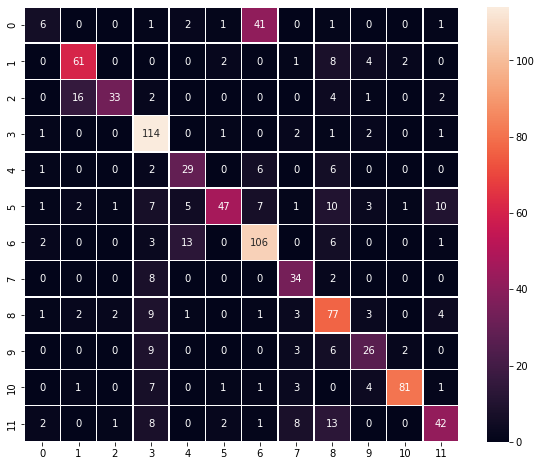

In [48]:
# Obtaining the categorical values from y_test_encoded and y_pred
y_pred2_arg=np.argmax(y_pred2,axis=1)
y_test2_arg=np.argmax(y_test_encoded,axis=1)

# Plotting the Confusion Matrix using confusion matrix() function which is also predefined tensorflow module
confusion_matrix = tf.math.confusion_matrix(y_test_arg,y_pred2_arg)
f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(
    confusion_matrix,
    annot=True,
    linewidths=.4,
    fmt="d",
    square=True,
    ax=ax
)
plt.show()

<b> Observations</b><br>
- We observe that some of the classes are not predicted correctly. 
- In comparison to the rest, we can see that classes 1, 2, 3, 5, 6, 7 and 10 are well classified.
- We can also observe that classes 0, 9 and 11 are mostly misclassified.

## **Metrics classification report** 
**Model 2**

In [49]:
#Accuracy as per the classification report 

cr=metrics.classification_report(y_test_arg,y_pred2_arg)
print(cr)

              precision    recall  f1-score   support

           0       0.43      0.11      0.18        53
           1       0.74      0.78      0.76        78
           2       0.89      0.57      0.69        58
           3       0.67      0.93      0.78       122
           4       0.58      0.66      0.62        44
           5       0.87      0.49      0.63        95
           6       0.65      0.81      0.72       131
           7       0.62      0.77      0.69        44
           8       0.57      0.75      0.65       103
           9       0.60      0.57      0.58        46
          10       0.94      0.82      0.88        99
          11       0.68      0.55      0.60        77

    accuracy                           0.69       950
   macro avg       0.69      0.65      0.65       950
weighted avg       0.70      0.69      0.68       950



## **Visualizing the prediction**

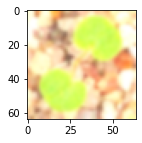

Predicted Label ['Small-flowered Cranesbill']
True Label Small-flowered Cranesbill


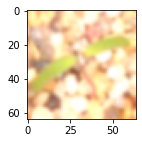

Predicted Label ['Sugar beet']
True Label Fat Hen


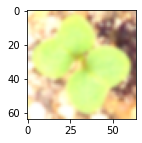

Predicted Label ['Charlock']
True Label Charlock


In [50]:
# Visualizing the predicted and correct label of images from test data
plt.figure(figsize=(2,2))
plt.imshow(X_test[2])
plt.show()
print('Predicted Label', enc.inverse_transform(model2.predict((X_test_normalized[2].reshape(1,64,64,3)))))      # reshaping the input image as we are only trying to predict using a single image
print('True Label', enc.inverse_transform(y_test_encoded)[2])                                                     # using inverse_transform() to get the output label from the output vector

plt.figure(figsize=(2,2))
plt.imshow(X_test[100])
plt.show()
print('Predicted Label', enc.inverse_transform(model2.predict((X_test_normalized[100].reshape(1,64,64,3)))))    # reshaping the input image as we are only trying to predict using a single image
print('True Label', enc.inverse_transform(y_test_encoded)[100])                                                    # using inverse_transform() to get the output label from the output vector
 
plt.figure(figsize=(2,2))
plt.imshow(X_test[850])
plt.show()
print('Predicted Label', enc.inverse_transform(model2.predict((X_test_normalized[850].reshape(1,64,64,3)))))    # reshaping the input image as we are only trying to predict using a single image
print('True Label', enc.inverse_transform(y_test_encoded)[850]) 

## **Model3**

**After data augmentation, I will try to apply batch normalization, dropout, maxpooling, stride, ... techniques to overcome more on overfitting and improve the model accuracy.** 

In [63]:
# Clearing backend
backend.clear_session()

# Fixing the seed for random number generators
import random
np.random.seed(1)
random.seed(1)
tf.random.set_seed(1)

In [64]:
# Intializing a sequential model
model3 = Sequential()

# Adding first conv layer with 64 filters and kernel size 3x3 , padding 'same' provides the output size same as the input size
# Input_shape denotes input image dimension of images
model3.add(Conv2D(64, (3, 3), padding="same",  input_shape=(64, 64, 3)))
#model3.add(BatchNormalization())
model3.add(Activation('relu'))
model3.add(MaxPooling2D((2, 2), padding = 'same'))          # Adding max pooling to reduce the size of output of first conv layer
model3.add(SpatialDropout2D(0.3))

# Adding second conv layer
model3.add(Conv2D(64, (3, 3), padding="same", strides=(2, 2)))
model3.add(Activation('relu'))
#model3.add(BatchNormalization())
model3.add(MaxPooling2D((2, 2), padding = 'same'))

# Adding third conv layer
model3.add(Conv2D(32, (3, 3), padding="same", strides=(2, 2)))
model3.add(BatchNormalization())
model3.add(Activation('relu'))
model3.add(MaxPooling2D((2, 2), padding = 'same'))
#model3.add(Dropout(0.3))

# flattening the output of the conv layer after max pooling to make it ready for creating dense connections
model3.add(Flatten())

# Adding a fully connected dense layer with 100 neurons    
model3.add(Dense(16, activation='relu'))

# Adding the output layer with 12 neurons and activation functions as softmax since this is a multi-class classification problem  
model3.add(Dense(12, activation='softmax'))

# Using Adam Optimizer
opt=Adam()

# Compile model
model3.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

# Generating the summary of the model
model3.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 64)        1792      
                                                                 
 activation (Activation)     (None, 64, 64, 64)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 32, 32, 64)       0         
 )                                                               
                                                                 
 spatial_dropout2d (SpatialD  (None, 32, 32, 64)       0         
 ropout2D)                                                       
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 64)        36928     
                                                                 
 activation_1 (Activation)   (None, 16, 16, 64)        0

In [65]:
history_3 = model3.fit(train_datagen.flow(X_train_normalized,y_train_encoded,
                                       batch_size=64, 
                                       seed=1,
                                       shuffle=False),
                    epochs=100,
                    steps_per_epoch=X_train_normalized.shape[0] // 64,
                    validation_data=(X_val_normalized,y_val_encoded),
                    verbose=1, use_multiprocessing=True)

Epoch 1/100
47/47 [==============================] - 5s 104ms/step - loss: 2.4915 - accuracy: 0.1317 - val_loss: 2.4516 - val_accuracy: 0.1276
Epoch 2/100
47/47 [==============================] - 4s 79ms/step - loss: 2.3786 - accuracy: 0.2315 - val_loss: 2.3792 - val_accuracy: 0.2421
Epoch 3/100
47/47 [==============================] - 4s 76ms/step - loss: 2.2938 - accuracy: 0.2231 - val_loss: 2.3241 - val_accuracy: 0.2382
Epoch 4/100
47/47 [==============================] - 4s 77ms/step - loss: 2.1345 - accuracy: 0.3149 - val_loss: 2.2187 - val_accuracy: 0.3592
Epoch 5/100
47/47 [==============================] - 4s 77ms/step - loss: 1.9384 - accuracy: 0.3488 - val_loss: 2.0471 - val_accuracy: 0.3842
Epoch 6/100
47/47 [==============================] - 4s 77ms/step - loss: 1.7825 - accuracy: 0.3726 - val_loss: 1.8516 - val_accuracy: 0.4250
Epoch 7/100
47/47 [==============================] - 4s 77ms/step - loss: 1.6375 - accuracy: 0.4079 - val_loss: 1.7072 - val_accuracy: 0.4684
Epoch

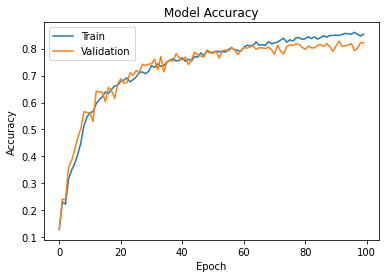

In [66]:
plt.plot(history_3.history['accuracy'])
plt.plot(history_3.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [67]:
accuracy3 = model3.evaluate(X_test_normalized, y_test_encoded, verbose=2)

30/30 - 0s - loss: 0.5856 - accuracy: 0.8116 - 195ms/epoch - 7ms/step


### **Generating the predictions using test data**

In [68]:
# Here we would get the output as probablities for each category
y_pred3=model3.predict(X_test_normalized)

## **Ploting the Confusion Matrix**

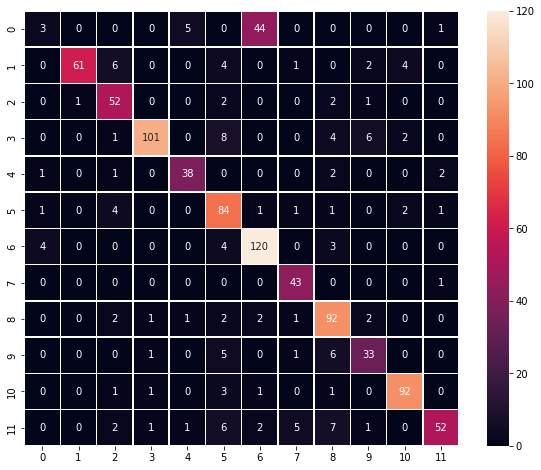

In [69]:
# Obtaining the categorical values from y_test_encoded and y_pred
y_pred3_arg=np.argmax(y_pred3,axis=1)
y_test3_arg=np.argmax(y_test_encoded,axis=1)

# Plotting the Confusion Matrix using confusion matrix() function which is also predefined tensorflow module
confusion_matrix = tf.math.confusion_matrix(y_test_arg,y_pred3_arg)
f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(
    confusion_matrix,
    annot=True,
    linewidths=.4,
    fmt="d",
    square=True,
    ax=ax
)
plt.show()

<b> Observations</b><br>
- We observe that some of the classes are not predicted correctly. 
- Most of the classes are well classified.
- We can also observe that classes 0 is mostly misclassified.

## **Metrics classification report** 
**Model 3**

In [70]:
#Accuracy as per the classification report 

cr=metrics.classification_report(y_test_arg,y_pred3_arg)
print(cr)

              precision    recall  f1-score   support

           0       0.33      0.06      0.10        53
           1       0.98      0.78      0.87        78
           2       0.75      0.90      0.82        58
           3       0.96      0.83      0.89       122
           4       0.84      0.86      0.85        44
           5       0.71      0.88      0.79        95
           6       0.71      0.92      0.80       131
           7       0.83      0.98      0.90        44
           8       0.78      0.89      0.83       103
           9       0.73      0.72      0.73        46
          10       0.92      0.93      0.92        99
          11       0.91      0.68      0.78        77

    accuracy                           0.81       950
   macro avg       0.79      0.78      0.77       950
weighted avg       0.80      0.81      0.80       950



## **Visializing the prediction**

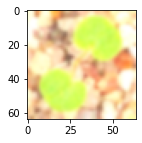

Predicted Label ['Small-flowered Cranesbill']
True Label Small-flowered Cranesbill


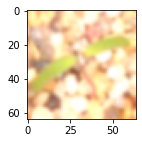

Predicted Label ['Fat Hen']
True Label Fat Hen


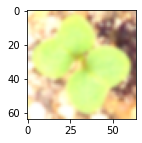

Predicted Label ['Charlock']
True Label Charlock


In [71]:
# Visualizing the predicted and correct label of images from test data
plt.figure(figsize=(2,2))
plt.imshow(X_test[2])
plt.show()
print('Predicted Label', enc.inverse_transform(model3.predict((X_test_normalized[2].reshape(1,64,64,3)))))      # reshaping the input image as we are only trying to predict using a single image
print('True Label', enc.inverse_transform(y_test_encoded)[2])                                                     # using inverse_transform() to get the output label from the output vector

plt.figure(figsize=(2,2))
plt.imshow(X_test[100])
plt.show()
print('Predicted Label', enc.inverse_transform(model3.predict((X_test_normalized[100].reshape(1,64,64,3)))))    # reshaping the input image as we are only trying to predict using a single image
print('True Label', enc.inverse_transform(y_test_encoded)[100])                                                    # using inverse_transform() to get the output label from the output vector
 
plt.figure(figsize=(2,2))
plt.imshow(X_test[850])
plt.show()
print('Predicted Label', enc.inverse_transform(model3.predict((X_test_normalized[850].reshape(1,64,64,3)))))    # reshaping the input image as we are only trying to predict using a single image
print('True Label', enc.inverse_transform(y_test_encoded)[850]) 

## **Model4**
### Transfer Learning using VGG16
- Let's try again, but this time, we will be using the idea of **Transfer Learning**. We will be loading a pre-built architecture - **VGG16**, which was trained on the ImageNet dataset and is the runner-up in the ImageNet competition in 2014.

- For training VGG16, we will directly use the convolutional and pooling layers and freeze their weights i.e. no training will be done on them. For classification, we will replace the existing fully-connected layers with FC layers created specifically for our problem.

In [72]:
# Clearing backend
backend.clear_session()

# Fixing the seed for random number generators
import random
np.random.seed(1)
random.seed(1)
tf.random.set_seed(1)

In [73]:
vgg_model = VGG16(weights='imagenet', include_top = False, input_shape = (64,64,3))
vgg_model.summary()

58900480/58889256 [==============================] - 0s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 64, 64, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 64, 64, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 64, 64, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 32, 32, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 32, 32, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 32, 32, 128)       147584    
                                                              

In [74]:
# Making all the layers of the VGG model non-trainable. i.e. freezing them
for layer in vgg_model.layers:
    layer.trainable = False

In [75]:
model4 = Sequential()

# Adding the convolutional part of the VGG16 model from above
model4.add(vgg_model)

# Flattening the output of the VGG16 model because it is from a convolutional layer
model4.add(Flatten())

# Adding a fully connected dense layer with 64 neurons    
model4.add(Dense(64, activation='relu', kernel_initializer='he_uniform'))
model4.add(BatchNormalization())

# Adding a fully connected dense layer with 32 neurons    
model4.add(Dense(32, activation='relu', kernel_initializer='he_uniform'))
model4.add(Dropout(0.2))

# Adding a fully connected dense layer with 16 neurons    
model4.add(Dense(16, activation='relu', kernel_initializer='he_uniform'))
#model4.add(Dropout(0.2))


# Adding the output layer with 12 neurons and activation functions as softmax since this is a multi-class classification problem  
model4.add(Dense(12, activation='softmax'))
#model4.add(Dropout(0.2))

# Using Adam Optimizer
opt=SGD(lr=0.01)

# Compile model
model4.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

# Generating the summary of the model
model4.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 2, 2, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 2048)              0         
                                                                 
 dense (Dense)               (None, 64)                131136    
                                                                 
 batch_normalization (BatchN  (None, 64)               256       
 ormalization)                                                   
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                        

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [76]:
history_4 = model4.fit(train_datagen.flow(X_train_normalized,y_train_encoded,
                                       batch_size=32, 
                                       seed=1,
                                       shuffle=False),
                    epochs=50,
                    steps_per_epoch=X_train_normalized.shape[0] // 32,
                    validation_data=(X_val_normalized,y_val_encoded),
                    verbose=1, use_multiprocessing=True)

Epoch 1/50
95/95 [==============================] - 7s 52ms/step - loss: 2.3609 - accuracy: 0.1885 - val_loss: 2.3466 - val_accuracy: 0.2013
Epoch 2/50
95/95 [==============================] - 4s 46ms/step - loss: 2.0644 - accuracy: 0.3072 - val_loss: 2.0580 - val_accuracy: 0.3237
Epoch 3/50
95/95 [==============================] - 5s 48ms/step - loss: 1.9319 - accuracy: 0.3513 - val_loss: 1.8357 - val_accuracy: 0.3934
Epoch 4/50
95/95 [==============================] - 5s 48ms/step - loss: 1.8079 - accuracy: 0.3934 - val_loss: 1.7321 - val_accuracy: 0.3908
Epoch 5/50
95/95 [==============================] - 4s 45ms/step - loss: 1.7173 - accuracy: 0.4211 - val_loss: 1.6499 - val_accuracy: 0.4408
Epoch 6/50
95/95 [==============================] - 8s 82ms/step - loss: 1.6492 - accuracy: 0.4444 - val_loss: 1.5905 - val_accuracy: 0.4474
Epoch 7/50
95/95 [==============================] - 10s 100ms/step - loss: 1.5972 - accuracy: 0.4539 - val_loss: 1.5547 - val_accuracy: 0.4553
Epoch 8/50


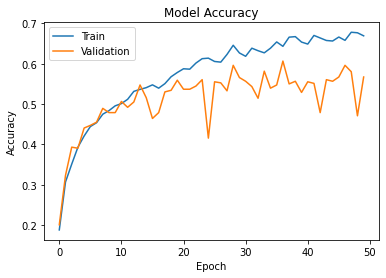

In [77]:
plt.plot(history_4.history['accuracy'])
plt.plot(history_4.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [78]:
accuracy4 = model4.evaluate(X_test_normalized, y_test_encoded, verbose=2)

30/30 - 1s - loss: 1.2982 - accuracy: 0.5758 - 962ms/epoch - 32ms/step


## **Generating the predictions using test data**

In [79]:
# Here we would get the output as probablities for each category
y_pred4=model4.predict(X_test_normalized)

## **Ploting the Confusion Matrix**

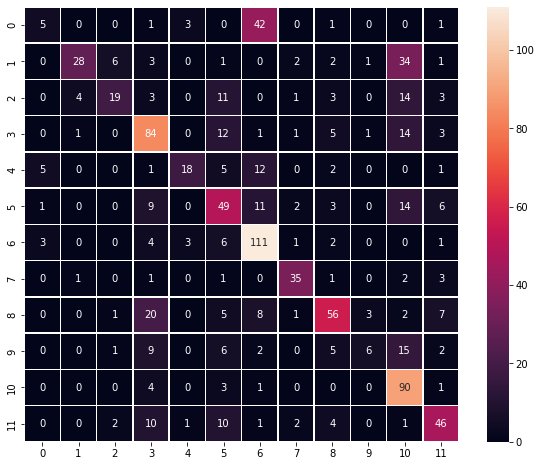

In [80]:
# Obtaining the categorical values from y_test_encoded and y_pred
y_pred4_arg=np.argmax(y_pred4,axis=1)
y_test4_arg=np.argmax(y_test_encoded,axis=1)

# Plotting the Confusion Matrix using confusion matrix() function which is also predefined tensorflow module
confusion_matrix = tf.math.confusion_matrix(y_test_arg,y_pred4_arg)
f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(
    confusion_matrix,
    annot=True,
    linewidths=.4,
    fmt="d",
    square=True,
    ax=ax
)
plt.show()

<b> Observations</b><br>
- We observe that some of the classes are not predicted correctly. 
- In comparison to the rest, we can see that classes 3, 7, 10 and 11 are well classified.
- We can also observe that classes 0, 2, 5, and 9 are mostly misclassified.

## **Metrics classification report** 
**Model 4**

In [81]:
#Accuracy as per the classification report 

cr=metrics.classification_report(y_test_arg,y_pred4_arg)
print(cr)

              precision    recall  f1-score   support

           0       0.36      0.09      0.15        53
           1       0.82      0.36      0.50        78
           2       0.66      0.33      0.44        58
           3       0.56      0.69      0.62       122
           4       0.72      0.41      0.52        44
           5       0.45      0.52      0.48        95
           6       0.59      0.85      0.69       131
           7       0.78      0.80      0.79        44
           8       0.67      0.54      0.60       103
           9       0.55      0.13      0.21        46
          10       0.48      0.91      0.63        99
          11       0.61      0.60      0.61        77

    accuracy                           0.58       950
   macro avg       0.60      0.52      0.52       950
weighted avg       0.59      0.58      0.55       950



## **Visualizing the predicyion**

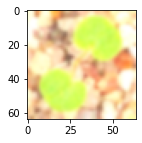

Predicted Label ['Small-flowered Cranesbill']
True Label Small-flowered Cranesbill


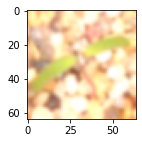

Predicted Label ['Small-flowered Cranesbill']
True Label Fat Hen


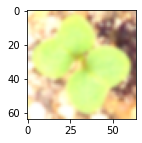

Predicted Label ['Charlock']
True Label Charlock


In [85]:
# Visualizing the predicted and correct label of images from test data
plt.figure(figsize=(2,2))
plt.imshow(X_test[2])
plt.show()
print('Predicted Label', enc.inverse_transform(model4.predict((X_test_normalized[2].reshape(1,64,64,3)))))      # reshaping the input image as we are only trying to predict using a single image
print('True Label', enc.inverse_transform(y_test_encoded)[2])                                                     # using inverse_transform() to get the output label from the output vector

plt.figure(figsize=(2,2))
plt.imshow(X_test[100])
plt.show()
print('Predicted Label', enc.inverse_transform(model4.predict((X_test_normalized[515].reshape(1,64,64,3)))))    # reshaping the input image as we are only trying to predict using a single image
print('True Label', enc.inverse_transform(y_test_encoded)[100])                                                    # using inverse_transform() to get the output label from the output vector
 
plt.figure(figsize=(2,2))
plt.imshow(X_test[850])
plt.show()
print('Predicted Label', enc.inverse_transform(model4.predict((X_test_normalized[850].reshape(1,64,64,3)))))    # reshaping the input image as we are only trying to predict using a single image
print('True Label', enc.inverse_transform(y_test_encoded)[850]) 

## **Conclusion**

**Model1_1:** 
* In this model, the brighted data is used for classification. 
* The accuracy of the model on test dataset is 43%.
* The model is overfited.

**Model1_2:**
* Inthe model the gaussian blur filter aplied on blured data, and the result is used for claasification.
* The accuracy of the model on test dataset is 45%.
* The model is still overfited.

**Model1_3:**
* In this model, the size of the previouse data (Brighted and blured) were decreased. 
* The accuracy of the model on test dataset is 62%.
* The model is overfited. 

**Model2:**
* In model 2, data augmentation is used to reduce the overfitting problem.
* Data augmentation improve the model and decrease the overfitting problem.
* The accuracy of the model on test dataset is 69%. 

**Model3:**
* In model 3, batchnormalization, dropout, maxpooling, and lots of different techniques used to imrove the model accuracy
* The accuracy of the model on test dataset is 81%.
* Lotts of different parameters such as batch size, learning rate, optimization method were tested and the final one (the best accuracy) is finalized. 

**Model4:**
* In model 4, the learning was transfered from model VGG16. 
* The accuracy of the model on test dataset is 57%.
* With respect to the other models, the improvement was low.
* Lots od parameters and combinations are checked in this model.


**Finally model3 was selected as the best model for further prediction**

In [2]:
# Summary of the all models
pd.DataFrame({'Models':['Mode1_1, Data with Brithness','Model1_2, Data with BR+Blur','Model1_3, Data with BR+Blur+SizeReduce', 'Model2, Data Augmentation', 'Model3, BN+DO+Max+ST', 'Model4, Transfer VGG16'],'Train Accuracy':['48%','54%','85%','79%','85%','67%'],'Validation Accuracy':['44%','45%','63%','70%','82%','81%'],'Test Accuracy':['43%','45%','62%','69%','81%','57%']})

Models Train Accuracy Validation Accuracy  \
0            Mode1_1, Data with Brithness            48%                 44%   
1             Model1_2, Data with BR+Blur            54%                 45%   
2  Model1_3, Data with BR+Blur+SizeReduce            85%                 63%   
3               Model2, Data Augmentation            79%                 70%   
4                    Model3, BN+DO+Max+ST            85%                 82%   
5                  Model4, Transfer VGG16            67%                 81%   

  Test Accuracy  
0           43%  
1           45%  
2           62%  
3           69%  
4           81%  
5           57%

### **Some samples of class 0 which are difficult to predict for most of the model**

In [53]:
for i in range (0,100):
  if y_train_encoded[i][0]==1:
     print(i)

17
42
69
75
97


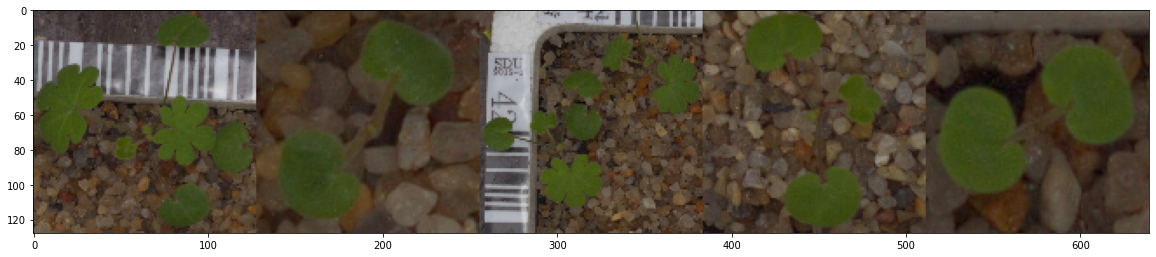

In [61]:
fig = plt.figure(figsize=(20, 8))
fig.set_size_inches(20, 8)

sample_all=cv2.hconcat((images[17],images[42],images[69],images[75],images[97]))

plt.imshow(sample_all)


## **Scope of Improvement**

- Class 0, is the most difficult one; may be more investigation for EDA analysis in this class set could improve the model accuracy.

- More investigation of color adjusment filets, such as HSV, and more typr of kernel can help to improve the model accuracy.

- These models can also be trained on the original image_size i.e 128 x 128 rather than being reduced to 64.

- Data Augmentation can be performed more and dropout_rate can be changed to improve the model performance.

- Other Transfer Learning architectures can also be used to train the CNN model and these models can be used for classification.

- Grid search techniques like random or dast, may help to improve the model hyperparameters.